# Fashion Product Image Classification using CNN and ANN:

## Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


## Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

## Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

## License
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Importing the required libraries:

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

#### Loading the dataset:

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(X_trainfull,y_trainfull),(X_testfull,y_testfull)=fashion_mnist.load_data()

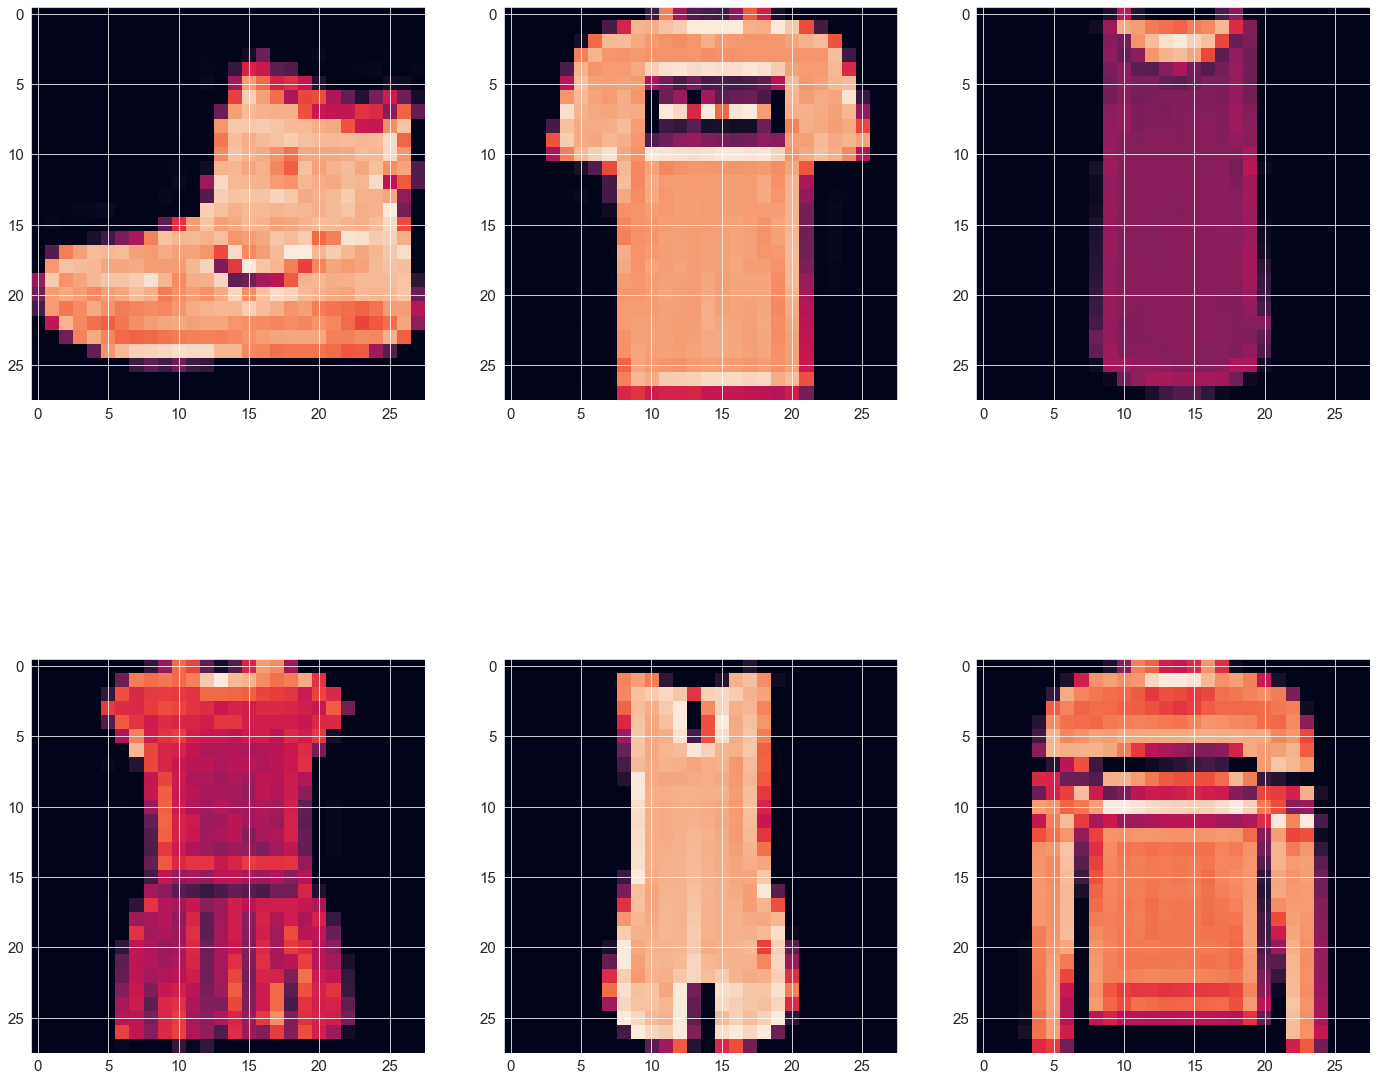

In [5]:
plt.figure(figsize=(24,22))
sns.set_style('darkgrid')
j=1
for i in [0,1,2,3,4,5]:
    plt.subplot(2,3,j)
    plt.imshow(X_trainfull[i])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    j+=1
plt.show()

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
            'Bag','Ankle boot']
for i in [0,1,2,3,4,5]:
    print(class_names[y_trainfull[i]])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover


### Data Normalisation 

We then normalize the data dimensions so that they are all approximately of the same scale.

In [7]:
X_train_n=X_trainfull/255.0
X_test_n=X_testfull/255.0

### Split the data into train/Validation/test datasets.

In [8]:
# Not to be touched:
print('Shape of X_train : ',X_train_n.shape)
print('Shape of y_train : ',y_trainfull.shape)
print('Shape of X_test : ',X_test_n.shape)
print('Shape of y_test : ',y_testfull.shape,'\n')
X_train=np.expand_dims(X_train_n,-1)
print('Reshaped datasets: ','\n')
print('Dimension of training data : ',X_train.ndim)
X_test=np.expand_dims(X_test_n,-1)
print('Dimension of testing data : ',X_test.ndim,'\n')
print('Updated shapes of Xtrain and Xtest datasets: ','\n')
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test : ',X_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of y_train :  (60000,)
Shape of X_test :  (10000, 28, 28)
Shape of y_test :  (10000,) 

Reshaped datasets:  

Dimension of training data :  4
Dimension of testing data :  4 

Updated shapes of Xtrain and Xtest datasets:  

Shape of X_train :  (60000, 28, 28, 1)
Shape of X_test :  (10000, 28, 28, 1)


In [9]:
X_train_new,X_valid=X_train[5000:],X_train[:5000]
y_train,y_valid=y_trainfull[5000:],y_trainfull[:5000]
print('Shape of X_train : ',X_train_new.shape)
print('Shape of X_valid : ',X_valid.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_valid : ',y_valid.shape)

Shape of X_train :  (55000, 28, 28, 1)
Shape of X_valid :  (5000, 28, 28, 1)
Shape of y_train :  (55000,)
Shape of y_valid :  (5000,)


### Creating a CNN model:

In [12]:
np.random.seed(42)
tf.random.set_seed(42)
cnn_model=keras.models.Sequential()
cnn_model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',
                                 activation='relu',input_shape=(28,28,1)))
cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(units=300,activation='relu'))
cnn_model.add(keras.layers.Dense(units=100,activation='relu'))
cnn_model.add(keras.layers.Dense(units=10,activation='softmax'))
cnn_model.summary()             

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

2021-12-19 05:07:56.101959: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compiling and Training the Convolutional Neural Network model:

In [14]:
cnn_model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_history=cnn_model.fit(X_train_new,y_train,epochs=40,
                            validation_data=(X_valid,y_valid))
print(model_history.params,'\n')
print(model_history.history)

Epoch 1/40
1719/1719 [==============================] - 23s 13ms/step - loss: 0.7300 - accuracy: 0.7413 - val_loss: 0.5761 - val_accuracy: 0.7970
Epoch 2/40
1719/1719 [==============================] - 23s 14ms/step - loss: 0.4813 - accuracy: 0.8257 - val_loss: 0.4187 - val_accuracy: 0.8556
Epoch 3/40
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4233 - accuracy: 0.8486 - val_loss: 0.5915 - val_accuracy: 0.7780
Epoch 4/40
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3863 - accuracy: 0.8618 - val_loss: 0.3586 - val_accuracy: 0.8758
Epoch 5/40
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3599 - accuracy: 0.8695 - val_loss: 0.3493 - val_accuracy: 0.8746
Epoch 6/40
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3336 - accuracy: 0.8795 - val_loss: 0.3274 - val_accuracy: 0.8872
Epoch 7/40
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3161 - accuracy: 0.8864 - val_loss: 0.3319 -

### Plotting the loss and accuracy against epoch:

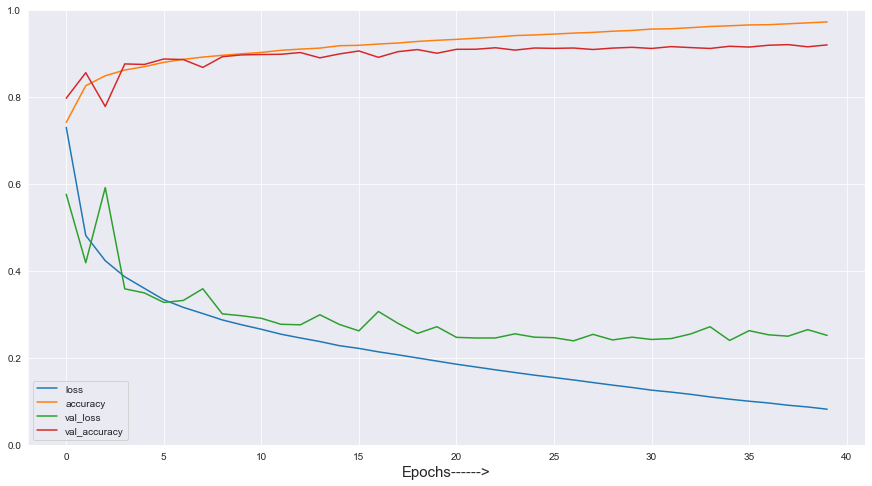

In [15]:
sns.set_style('darkgrid')
pd.DataFrame(model_history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs------>',fontsize=15)
plt.show()

### Evaluate the model accuracy on the test dataset:

In [16]:
cnn_model.evaluate(X_test,y_testfull)

313/313 [==============================] - 1s 4ms/step - loss: 0.2721 - accuracy: 0.9153


[0.2721326947212219, 0.9153000116348267]

### Prediction on first 6 data points:

In [17]:
X_newcnn=X_test[:6]
y_predcnn=cnn_model.predict(X_newcnn)
y_predcnn.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.  , 0.  , 0.  , 0.  , 0.  , 0.66, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
y_predcnn_class=np.argmax(cnn_model.predict(X_newcnn), axis=-1)
print('Class labels for unseen data : ',y_predcnn_class,'\n')
print(np.array(class_names)[y_predcnn_class])

Class labels for unseen data :  [9 2 1 1 6 1] 

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


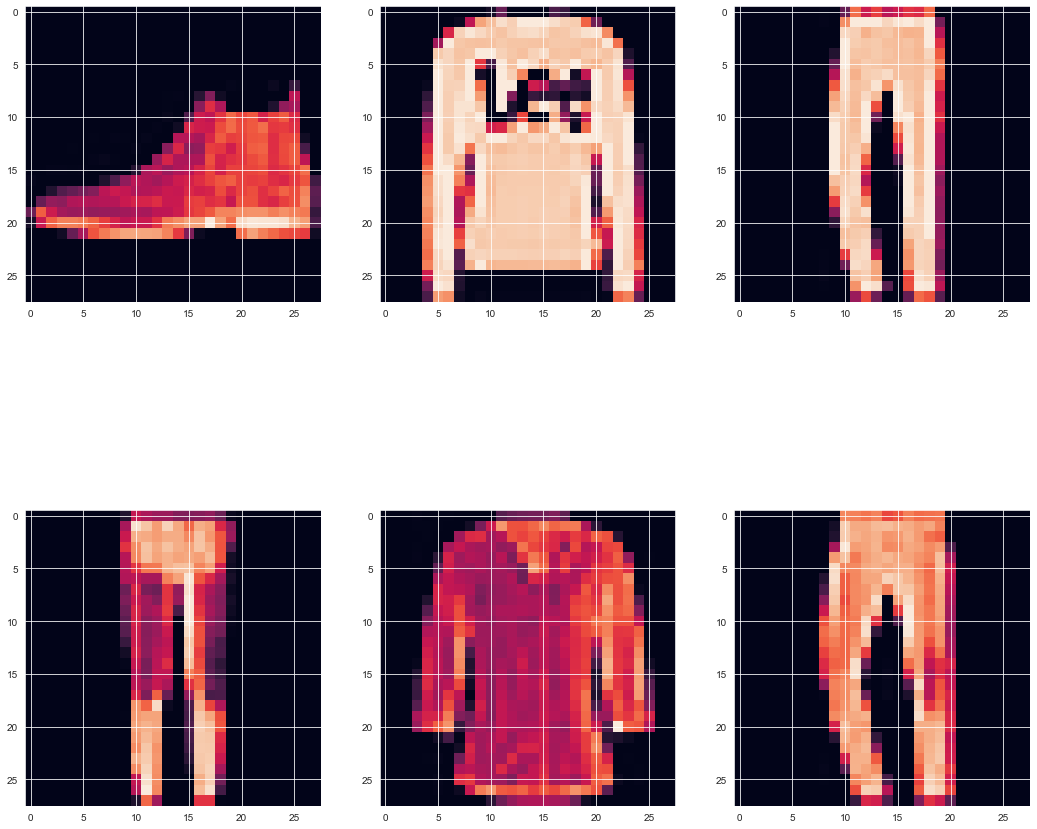

Images classified as : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


In [19]:
plt.figure(figsize=(18,17))
j=1
for i in [0,1,2,3,4,5]:
    plt.subplot(2,3,j)
    plt.imshow(X_newcnn[i])
    j+=1
plt.show()
print('Images classified as :',np.array(class_names)[y_predcnn_class])

In [46]:
del model
keras.backend.clear_session()

### Building the ANN Model:

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2021-12-19 05:31:12.183259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
for i in [1,2,3]:
    weights, biases = model.layers[i].get_weights()
    print(f'Weights assigned to {i} hidden layer : ',weights)
    print(f'Biases obtained in {i} hidden layer : ',biases,'\n')

Weights assigned to 1 hidden layer :  [[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]
Biases obtained in 1 hidden layer :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [13]:
biases.shape

(10,)

### Compiling and Training the Artificial Neural Network model:

In [15]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_history=model.fit(X_train_new,y_train,epochs=80,validation_data=(X_valid,y_valid))
print(model_history.params,'\n')
print(model_history.history)

Epoch 1/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4391 - accuracy: 0.8455 - val_loss: 0.5349 - val_accuracy: 0.7982
Epoch 4/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4122 - accuracy: 0.8563 - val_loss: 0.3917 - val_accuracy: 0.8654
Epoch 5/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3939 - accuracy: 0.8621 - val_loss: 0.3743 - val_accuracy: 0.8692
Epoch 6/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3708 - val_accuracy: 0.8732
Epoch 7/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8717 - val_loss: 0.3615 - val_accuracy:

1719/1719 [==============================] - 3s 2ms/step - loss: 0.1455 - accuracy: 0.9487 - val_loss: 0.3026 - val_accuracy: 0.8992
Epoch 58/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1425 - accuracy: 0.9496 - val_loss: 0.3030 - val_accuracy: 0.8958
Epoch 59/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1411 - accuracy: 0.9506 - val_loss: 0.3151 - val_accuracy: 0.8974
Epoch 60/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1384 - accuracy: 0.9516 - val_loss: 0.3046 - val_accuracy: 0.8994
Epoch 61/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1373 - accuracy: 0.9518 - val_loss: 0.2995 - val_accuracy: 0.8994
Epoch 62/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1338 - accuracy: 0.9524 - val_loss: 0.3075 - val_accuracy: 0.8972
Epoch 63/80
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1327 - accuracy: 0.9535 - val_loss: 0.3535 - val_accuracy: 0.88

* Accuracy on Train data : 96.43%

* Loss on Train data : 0.1019

* Validation accuracy: 90.08%

* Validation loss: 0.3141

### Plotting the loss and accuracy against epoch:

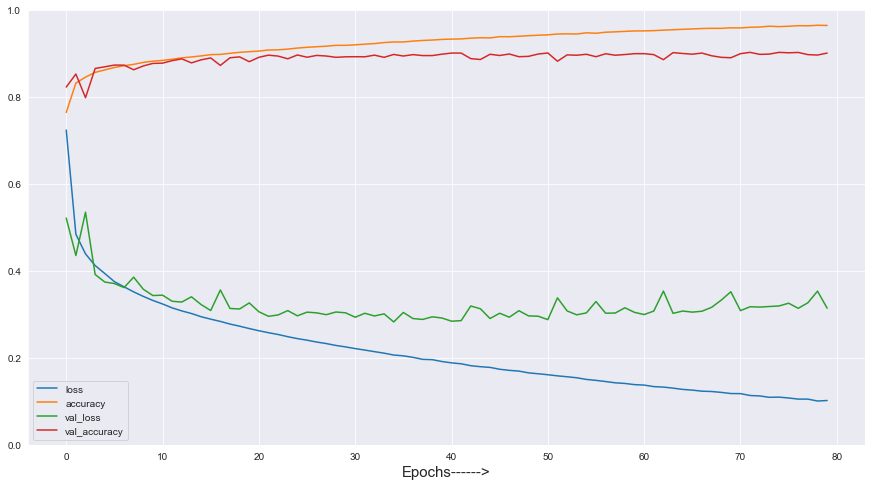

In [16]:
sns.set_style('darkgrid')
pd.DataFrame(model_history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs------>',fontsize=15)
plt.show()

### Evaluate the model accuracy on the test dataset:

In [17]:
model.evaluate(X_test,y_testfull)

313/313 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8912


[0.35363608598709106, 0.8912000060081482]

### Prediction on first 6 data points:

In [22]:
X_new=X_test[:6]

In [23]:
y_pred=model.predict(X_new)
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.89, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_predclass=np.argmax(model.predict(X_new), axis=-1)
print('Class labels for unseen data : ',y_predclass,'\n')
print(np.array(class_names)[y_predclass])

Class labels for unseen data :  [9 2 1 1 6 1] 

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


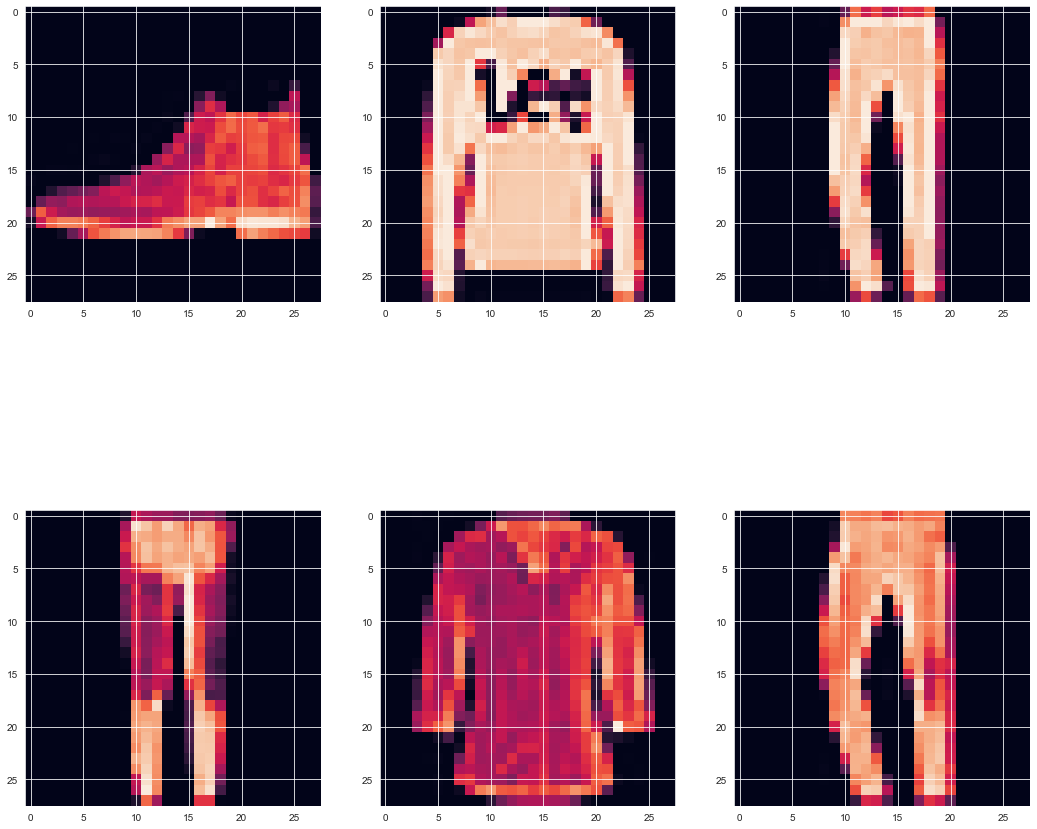

Images classified as : ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


In [25]:
plt.figure(figsize=(18,17))
j=1
for i in [0,1,2,3,4,5]:
    plt.subplot(2,3,j)
    plt.imshow(X_new[i])
    j+=1
plt.show()
print('Images classified as :',np.array(class_names)[y_predclass])